In [ ]:
# cd  ~/aiffel/DeepLearning/rock_scissor_paper/train/rock
# unzip rock.zip

## 라이브러리

In [1]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 학습 데이터 
- 데이터 다양성
1. 여러가지 손 모양을 찍었다.
    - 전체
        1. 손바닥/손등
        2. 동서남북
        3. 왼손/오른손
    - 가위
        1. 검지+중지 / 엄지+검지
    - 바위
        1. 엄지 보이게 / 안 보이게
    - 보
        1. 손가락 모으고 / 안 모으고
2. 조원들의 사진을 모두 합쳤다.

## 이미지 리사이즈

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

### 가위

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/train/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1309  images to be resized.
1309  images resized.
가위 이미지 resize 완료!


In [4]:
import os
 
file_list = os.listdir(image_dir_path)
file_count = 0
file_count = len(file_list) - 1
file_count

1309

### 바위

In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/train/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

380  images to be resized.
380  images resized.


In [6]:
import os
 
file_list = os.listdir(image_dir_path)
file_count = file_count + len(file_list) - 1
file_count

1689

### 보

In [7]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/train/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

1202  images to be resized.
1202  images resized.


In [8]:
import os
 
file_list = os.listdir(image_dir_path)
file_count = file_count + len(file_list) - 1
file_count

2891

## 학습 데이터 생성

In [9]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/train"
(x, y)=load_data(image_dir_path, file_count)

# 입력은 0~1 사이의 값으로 정규화
x = x / 255.0   

print("x shape: {}".format(x.shape))
print("y shape: {}".format(y.shape))

학습데이터(x)의 이미지 개수는 2891 입니다.
x shape: (2891, 28, 28, 3)
y shape: (2891,)


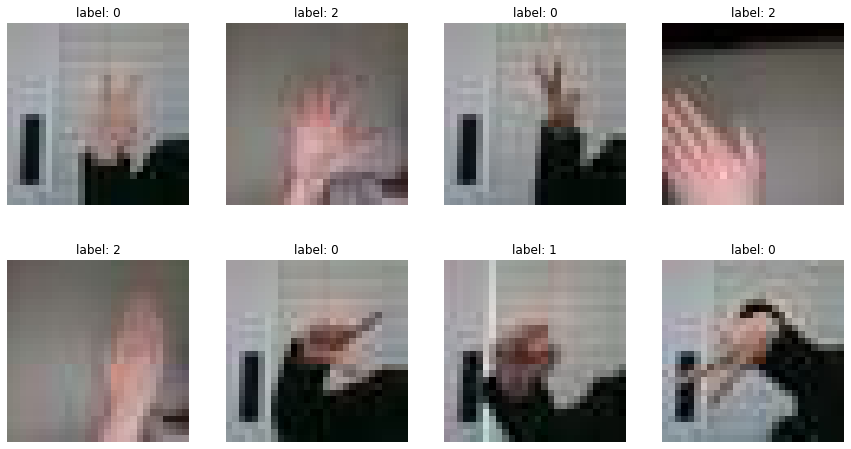

In [11]:
# 임의의 학습데이터 8개의 이미지와 라벨 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))

random_indices = np.random.choice(len(x), size=8, replace=False)

for i, index in enumerate(random_indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x[index])
    plt.title(f'label: {y[index]}')
    plt.axis('off')  # 이미지 축 제거

plt.show()

## 학습 데이터 분할하기

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=94)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((2312, 28, 28, 3), (579, 28, 28, 3), (2312,), (579,))

# 모델 설계
- 과적합을 줄이기 위해 dropout 사용

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [14]:
# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1 = 64
n_channel_2 = 64
n_channel_3 = 128
n_channel_4 = 128
n_dense = 32
n_train_epoch = 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  11


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

# 모델 학습 및 평가

In [16]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history  = model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_valid, y_valid))

# 훈련 정확도와 훈련 손실 데이터 가져오기
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

Epoch 1/20
73/73 [==============================] - 5s 63ms/step - loss: 0.8268 - accuracy: 0.6583 - val_loss: 1.1178 - val_accuracy: 0.4732
Epoch 2/20
73/73 [==============================] - 4s 61ms/step - loss: 0.5913 - accuracy: 0.7721 - val_loss: 0.5157 - val_accuracy: 0.7755
Epoch 3/20
73/73 [==============================] - 4s 61ms/step - loss: 0.4009 - accuracy: 0.8196 - val_loss: 0.4046 - val_accuracy: 0.8169
Epoch 4/20
73/73 [==============================] - 4s 62ms/step - loss: 0.3200 - accuracy: 0.8538 - val_loss: 0.2835 - val_accuracy: 0.8756
Epoch 5/20
73/73 [==============================] - 5s 63ms/step - loss: 0.2440 - accuracy: 0.8949 - val_loss: 0.2166 - val_accuracy: 0.9033
Epoch 6/20
73/73 [==============================] - 4s 61ms/step - loss: 0.1873 - accuracy: 0.9299 - val_loss: 0.1711 - val_accuracy: 0.9257
Epoch 7/20
73/73 [==============================] - 5s 62ms/step - loss: 0.1663 - accuracy: 0.9429 - val_loss: 0.1505 - val_accuracy: 0.9413
Epoch 8/20
73

## 시각화

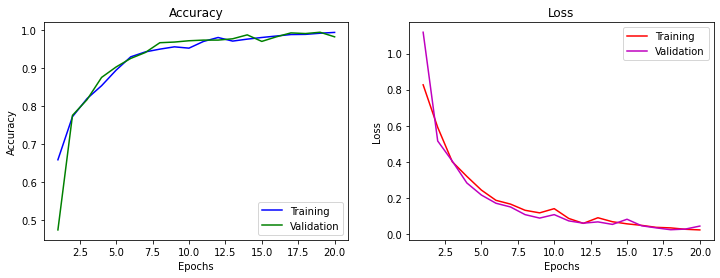

In [60]:
# 시각화
epochs = range(1, n_train_epoch + 1)

# 정확도 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training')
plt.plot(epochs, val_acc, 'g', label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'r', label='Training')
plt.plot(epochs, val_loss, 'm', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 모델 테스트

### 예빈 데이터

In [35]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/yb/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/yb/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/yb/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/yb"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [36]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 4.8867 - accuracy: 0.3767
test_loss: 4.886748313903809
test_accuracy: 0.3766666650772095


In [37]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [9.9960560e-01 3.7051408e-04 2.3972098e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [4.0519194e-06 9.9999428e-01 1.6735814e-06]
라벨: 2, 예측결과: 1


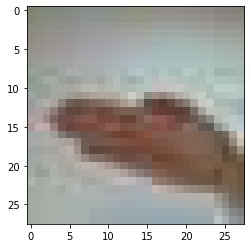

예측확률분포: [1.7730415e-05 9.9998128e-01 9.0043585e-07]
라벨: 2, 예측결과: 1


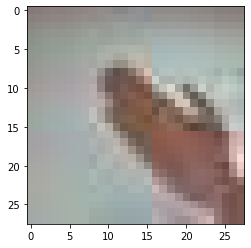

예측확률분포: [8.2699110e-04 9.9865353e-01 5.1943207e-04]
라벨: 0, 예측결과: 1


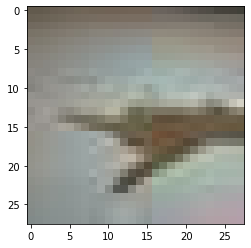

예측확률분포: [3.7400203e-09 1.0000000e+00 4.0243515e-09]
라벨: 2, 예측결과: 1


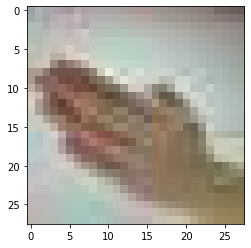

예측확률분포: [3.0461799e-03 9.9656564e-01 3.8821736e-04]
라벨: 0, 예측결과: 1


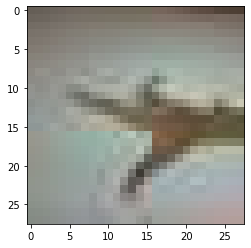

In [38]:
import random
wrong_predict_list=[]

for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [39]:
predicted_labels

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 민지 데이터

In [50]:
#민지
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/mj/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/mj/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/mj/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/mj"
(x_test, y_test)=load_data(image_dir_path)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [51]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 4.9002 - accuracy: 0.3267
test_loss: 4.900164604187012
test_accuracy: 0.3266666531562805


In [52]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.0269462  0.8439429  0.12911099]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


라벨: 2, 예측결과: 1


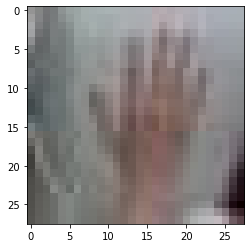

라벨: 2, 예측결과: 1


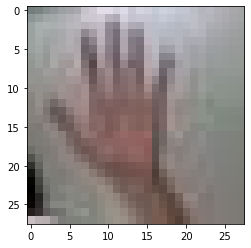

라벨: 2, 예측결과: 1


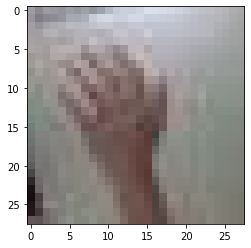

라벨: 2, 예측결과: 1


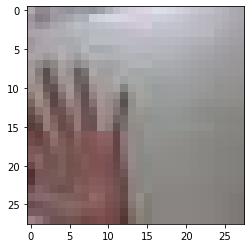

라벨: 0, 예측결과: 1


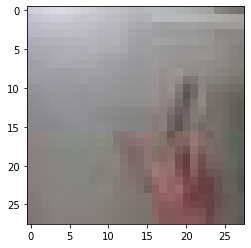

라벨: 2, 예측결과: 1


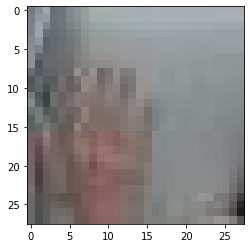

라벨: 0, 예측결과: 1


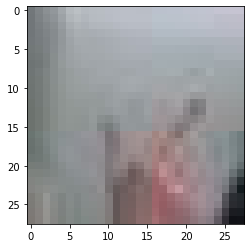

라벨: 2, 예측결과: 1


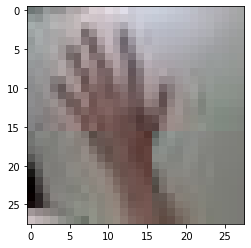

라벨: 2, 예측결과: 1


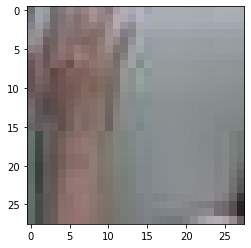

라벨: 2, 예측결과: 1


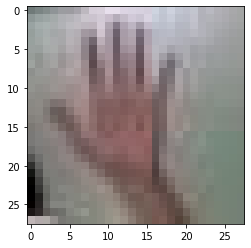

라벨: 0, 예측결과: 1


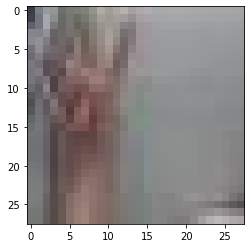

라벨: 2, 예측결과: 1


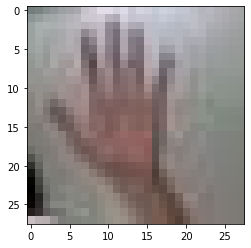

라벨: 0, 예측결과: 1


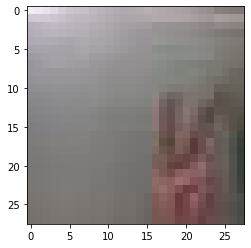

라벨: 2, 예측결과: 1


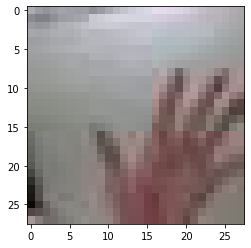

라벨: 2, 예측결과: 1


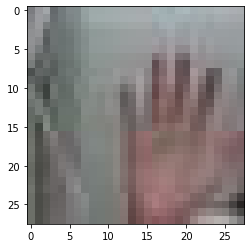

라벨: 0, 예측결과: 1


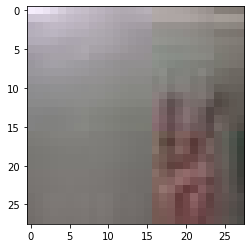

라벨: 0, 예측결과: 1


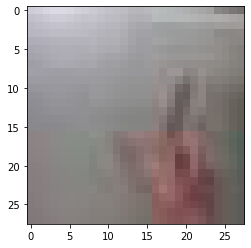

라벨: 0, 예측결과: 1


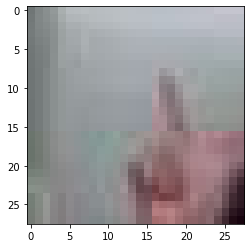

라벨: 2, 예측결과: 1


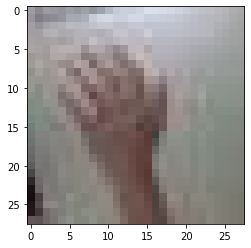

라벨: 2, 예측결과: 1


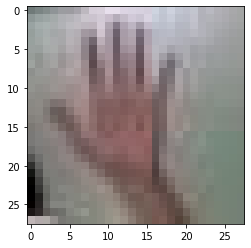

라벨: 0, 예측결과: 1


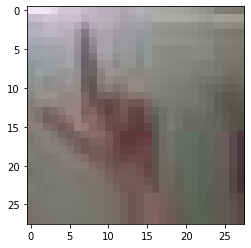

라벨: 2, 예측결과: 1


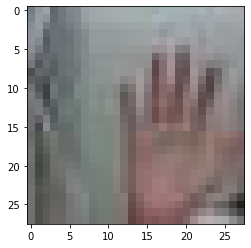

라벨: 0, 예측결과: 1


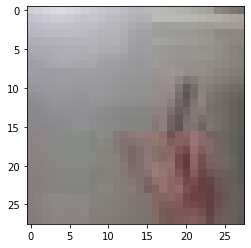

라벨: 2, 예측결과: 1


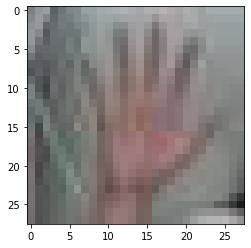

라벨: 0, 예측결과: 1


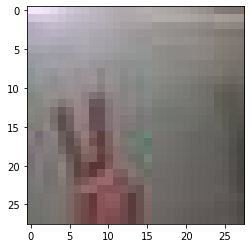

라벨: 0, 예측결과: 1


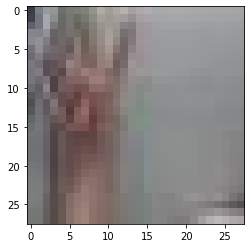

라벨: 0, 예측결과: 1


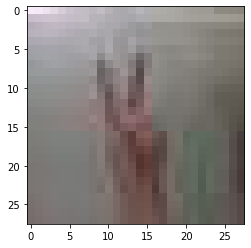

라벨: 0, 예측결과: 1


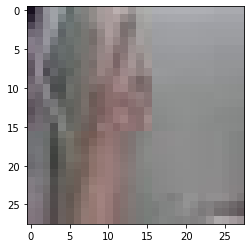

라벨: 2, 예측결과: 1


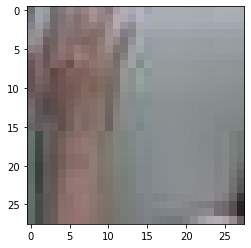

라벨: 0, 예측결과: 1


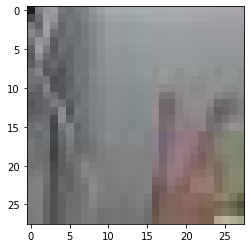

In [53]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=30)

for n in samples:
    #print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [54]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 도현 데이터

In [55]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/dh/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/dh/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/dh/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/dh"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [56]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 17.7077 - accuracy: 0.3433
test_loss: 17.707712173461914
test_accuracy: 0.34333333373069763


In [57]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.0000000e+00 5.5045874e-11 2.4389966e-14]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [9.9999976e-01 2.7501355e-07 1.4654922e-10]
라벨: 1, 예측결과: 0


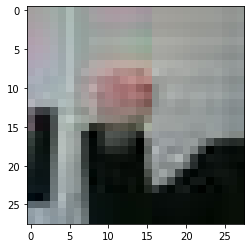

예측확률분포: [1.0000000e+00 5.6176084e-12 1.2767910e-16]
라벨: 2, 예측결과: 0


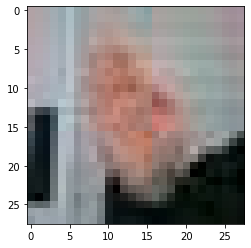

예측확률분포: [1.000000e+00 2.617458e-12 4.063810e-18]
라벨: 1, 예측결과: 0


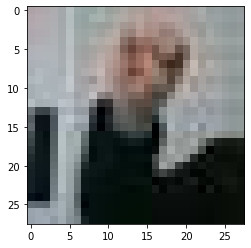

예측확률분포: [1.0000000e+00 2.8146740e-09 3.4652175e-14]
라벨: 1, 예측결과: 0


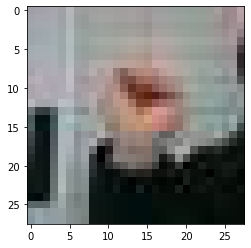

예측확률분포: [1.0000000e+00 1.2033412e-12 1.3559211e-16]
라벨: 2, 예측결과: 0


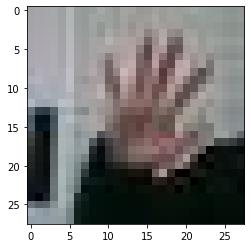

In [58]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [59]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 회고
validation의 accuracy가 높고 loss가 작아서 기대했는데 test dataset을 통해 확인해본 결과 처참한 결과가 나왔다. 

모든 조원들의 테스트 데이터셋으로 해보았는데 나와 민지님의 데이터에 대해서는 대부분 바위로 인식하고 도현님의 데이터에 대해서는 대부분 가위로 인식했다.

줏대가 있지만 없는 모델이 되어버린 것 같다.